In [1]:
import pandas as pd

#Leitura dos dados 
df = pd.read_csv('IOT-temp.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [2]:
#Remove linhas duplicadas
df = df.drop_duplicates()
#Trata a temperatura como numérico
df["temp"] = pd.to_numeric(df["temp"])
#Formata a data
df["noted_date"] = pd.to_datetime(df["noted_date"], format="%d-%m-%Y %H:%M")
df["hour"] = df["noted_date"].dt.hour
df["month"] = df["noted_date"].dt.month

In [3]:

#Remove colunas não pertinentes
df = df[["noted_date","temp","out/in","hour", "month"]]

In [4]:
#Temperatura média dentro
df_in = df[(df["out/in"] == "In")]
df_in["temp"].mean()

np.float64(30.4539198820349)

In [5]:
#Temperatura média fora
df_out = df[(df["out/in"] == "Out")]
df_out["temp"].mean()

np.float64(36.26516955733886)

<Axes: xlabel='hour'>

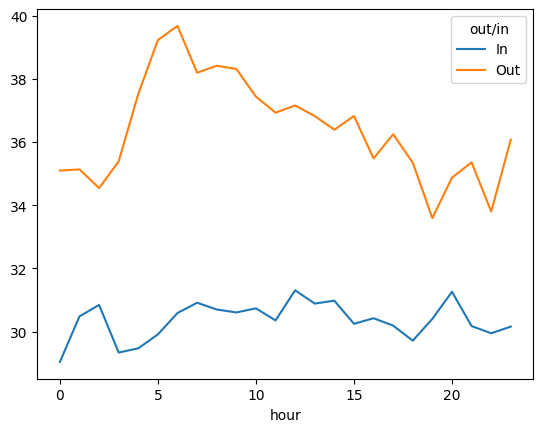

In [6]:
#Variação média entre temperaturas de acordo com a hora do dia
df_media_hora = df.groupby(["hour","out/in"])["temp"].mean().unstack()
df_media_hora.plot()

<Axes: title={'center': 'Temperatura média por mês'}, xlabel='month'>

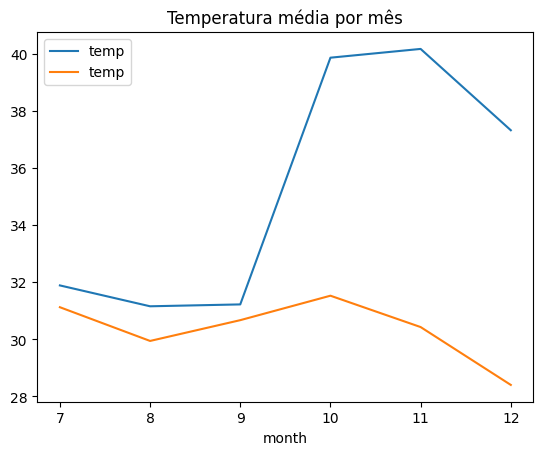

In [7]:
#Variação média de temperatura por mês
in_month = df[(df["out/in"]=="In")].groupby("month").agg({"temp":"mean"})
out_month = df[(df["out/in"]=="Out")].groupby("month").agg({"temp":"mean"})
ax = out_month.plot()
in_month.plot(ax=ax, title="Temperatura média por mês")